# Decision Trees: Konsep dan Implementasi

Decision Trees (Pohon Keputusan) adalah salah satu algoritma Machine Learning yang populer dan mudah dipahami. Algoritma ini bekerja dengan cara membuat model prediksi dalam bentuk struktur pohon yang terdiri dari node-node keputusan.

## Apa yang akan kita pelajari?
1. Konsep Dasar Decision Trees
2. Komponen-komponen Decision Trees
3. Cara Kerja Decision Trees
4. Implementasi dengan Scikit-learn
5. Contoh Kasus
6. Latihan

Mari kita mulai dengan mengimport library yang diperlukan!

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# Set random seed untuk reproducibility
np.random.seed(42)

## 1. Konsep Dasar Decision Trees

Decision Trees adalah algoritma machine learning yang bekerja dengan cara memecah dataset menjadi subset-subset yang lebih kecil berdasarkan fitur-fitur yang paling informatif. Algoritma ini membentuk struktur seperti pohon yang terdiri dari:

1. **Root Node (Node Akar)**: Node paling atas yang mewakili seluruh dataset
2. **Internal Node (Node Internal)**: Node yang mewakili pengujian pada fitur
3. **Leaf Node (Node Daun)**: Node terminal yang mewakili hasil prediksi

### Keuntungan Decision Trees:
- Mudah dipahami dan diinterpretasikan
- Dapat menangani data numerik dan kategorikal
- Membutuhkan sedikit persiapan data
- Dapat menangani data yang memiliki nilai hilang

### Kekurangan Decision Trees:
- Dapat menghasilkan pohon yang terlalu kompleks (overfitting)
- Sensitif terhadap perubahan kecil pada data
- Mungkin tidak seakurat algoritma lain untuk beberapa kasus

Mari kita lihat contoh sederhana menggunakan dataset Iris yang terkenal.

In [16]:
# Load dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Tampilkan informasi dataset
print("Informasi Dataset Iris:")
print("-" * 30)
print(f"Jumlah sampel: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Nama-nama fitur:\n{iris.feature_names}")
print(f"Nama-nama kelas:\n{iris.target_names}")

# Tampilkan beberapa baris pertama data
print("\nContoh data:")
print(X.head())

Informasi Dataset Iris:
------------------------------
Jumlah sampel: 150
Jumlah fitur: 4
Nama-nama fitur:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nama-nama kelas:
['setosa' 'versicolor' 'virginica']

Contoh data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## 2. Memahami Dataset

Dataset Iris adalah salah satu dataset klasik dalam machine learning yang berisi pengukuran dari tiga spesies bunga iris yang berbeda. Setiap sampel memiliki empat fitur:
1. Panjang sepal (cm)
2. Lebar sepal (cm)
3. Panjang petal (cm)
4. Lebar petal (cm)

Mari kita visualisasikan hubungan antara fitur-fitur ini menggunakan scatter plot.

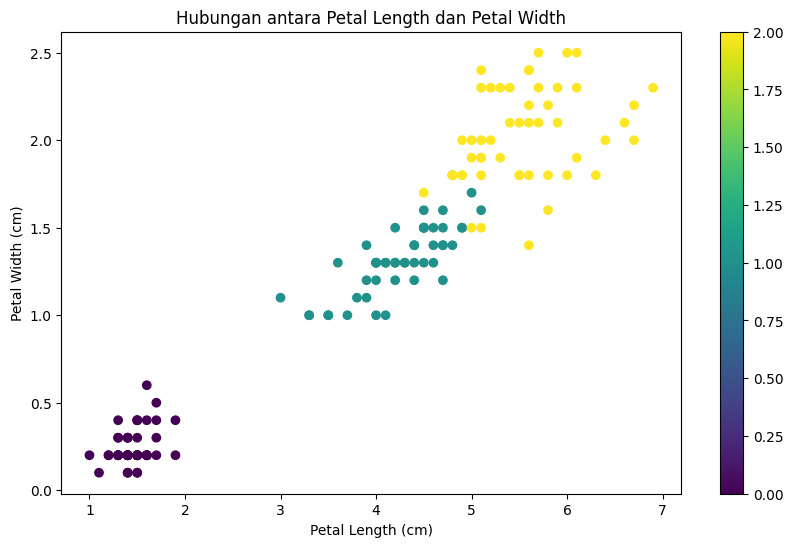

In [17]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['petal length (cm)'], X['petal width (cm)'], 
                     c=y, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Hubungan antara Petal Length dan Petal Width')
plt.colorbar(scatter)
plt.show()

## 3. Implementasi Decision Tree

Kita akan mengimplementasikan Decision Tree Classifier menggunakan scikit-learn. Langkah-langkahnya adalah:
1. Membagi data menjadi training dan testing set
2. Membuat dan melatih model
3. Melakukan prediksi
4. Mengevaluasi hasil

In [20]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Melakukan prediksi
y_pred = dt_classifier.predict(X_test)

# Menampilkan hasil evaluasi
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy Score: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



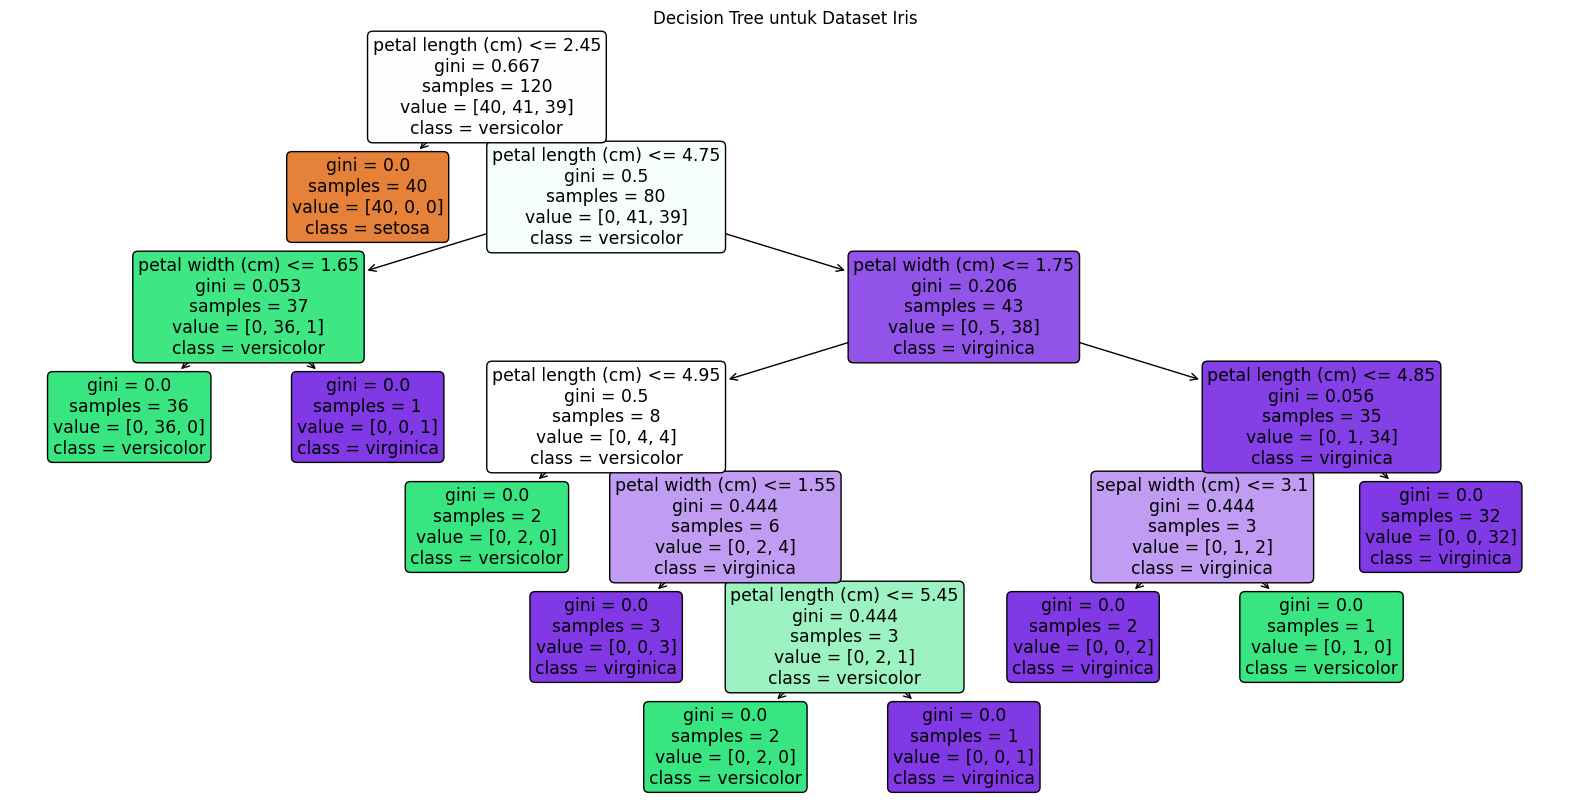

In [22]:
# Visualisasi pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree untuk Dataset Iris")
plt.show()

## 4. Interpretasi Model

Dari hasil di atas, kita dapat melihat bahwa:
1. Model mencapai akurasi 100% pada data testing
2. Pohon keputusan membagi data berdasarkan fitur-fitur yang paling informatif
3. Setiap node menunjukkan:
   - Kondisi pemisahan (misalnya "petal length ≤ 2.45")
   - Sampel yang tersisa di node tersebut
   - Distribusi kelas
   - Kelas mayoritas

## 5. Latihan

Mari kita coba beberapa latihan untuk memahami Decision Trees lebih dalam:

1. **Latihan 1**: Modifikasi parameter model
   - Ubah max_depth model
   - Bandingkan hasilnya dengan model sebelumnya

2. **Latihan 2**: Feature Importance
   - Temukan fitur mana yang paling penting dalam klasifikasi
   - Visualisasikan kepentingan fitur

Mari kita mulai dengan Latihan 1:


Model dengan max_depth=2:
Accuracy: 0.967


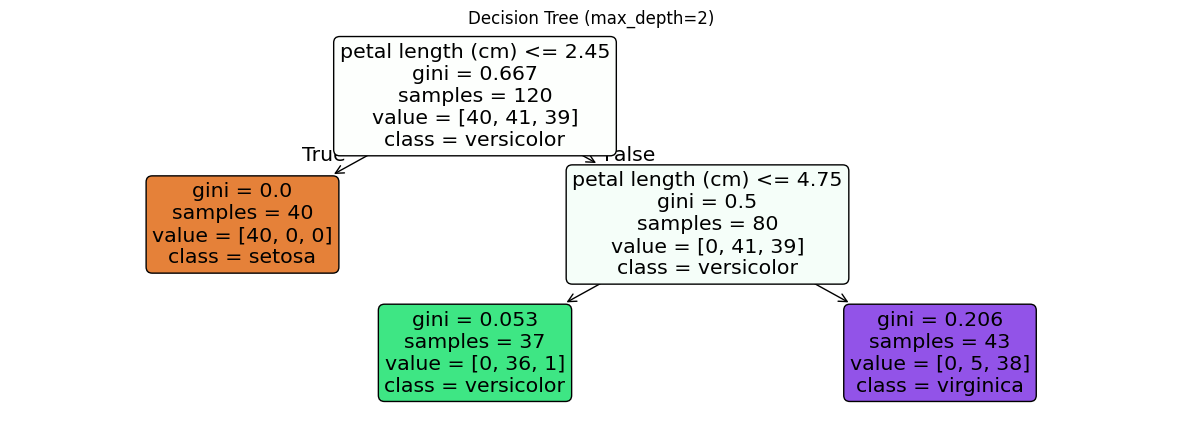


Model dengan max_depth=3:
Accuracy: 1.000


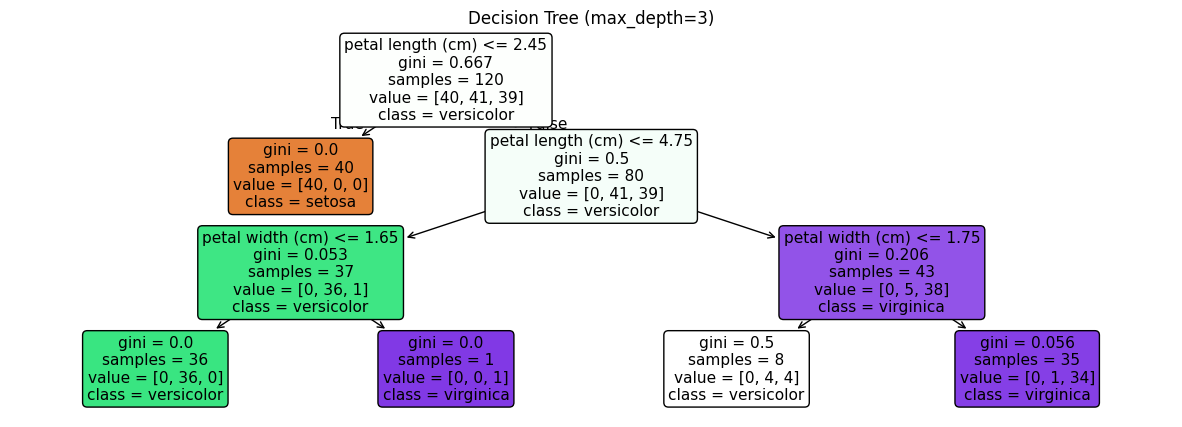


Model dengan max_depth=4:
Accuracy: 1.000


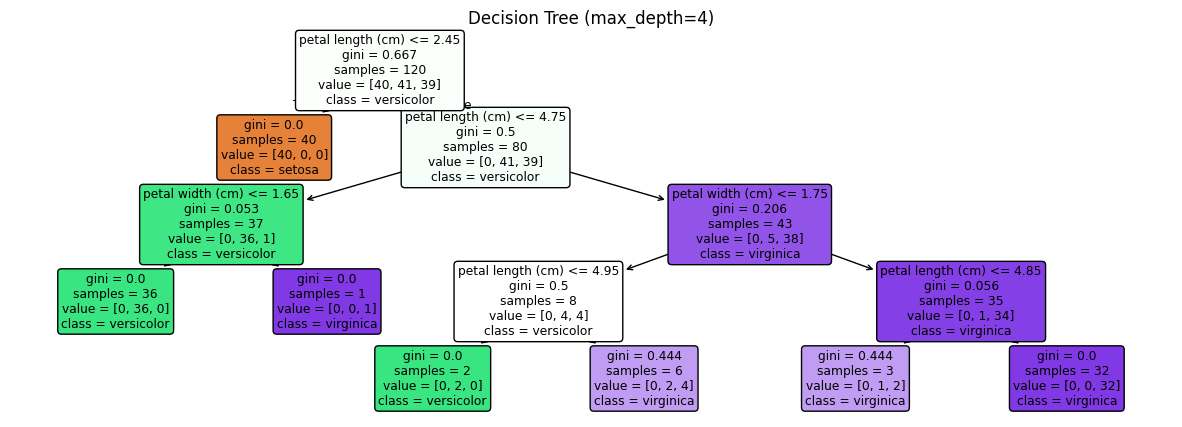

In [24]:
# Latihan 1: Membandingkan model dengan different max_depth
depths = [2, 3, 4]
accuracies = []

for depth in depths:
    # Membuat dan melatih model
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    # Prediksi dan evaluasi
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    print(f"\nModel dengan max_depth={depth}:")
    print(f"Accuracy: {acc:.3f}")
    
    # Visualisasi pohon
    plt.figure(figsize=(15,5))
    plot_tree(dt, feature_names=iris.feature_names, 
              class_names=iris.target_names, filled=True, rounded=True)
    plt.title(f"Decision Tree (max_depth={depth})")
    plt.show()

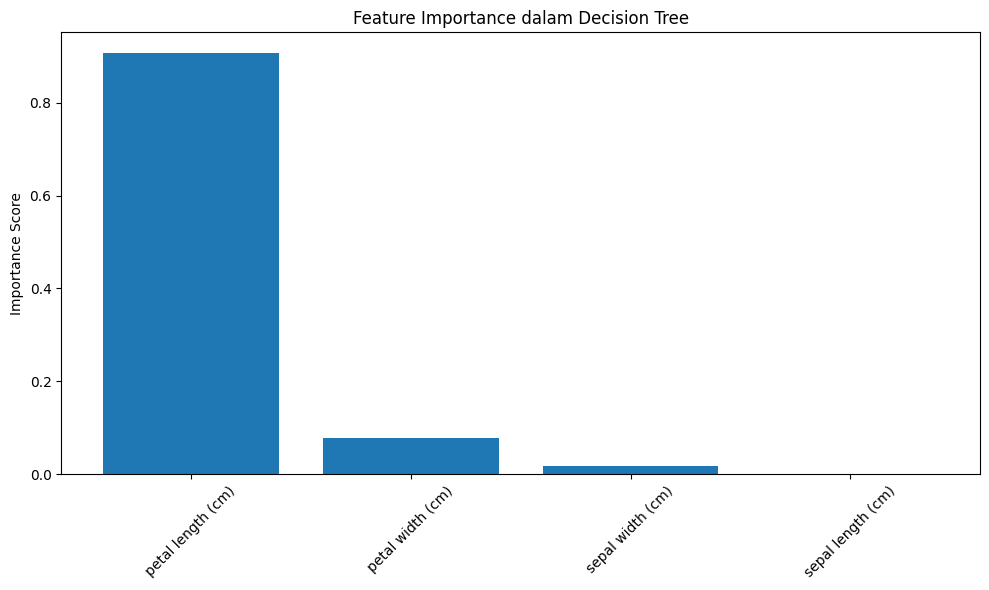


Feature Importance:
petal length (cm): 0.906
petal width (cm): 0.077
sepal width (cm): 0.017
sepal length (cm): 0.000


In [25]:
# Latihan 2: Feature Importance
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Mendapatkan feature importance
importances = dt.feature_importances_
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': importances
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance dalam Decision Tree')
plt.xticks(rotation=45)
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']}: {row['importance']:.3f}")

## 6. Kesimpulan dan Tantangan

Dari tutorial ini, kita telah mempelajari:
1. Konsep dasar Decision Trees
2. Implementasi Decision Trees menggunakan scikit-learn
3. Pengaruh parameter max_depth terhadap kompleksitas model
4. Pentingnya berbagai fitur dalam klasifikasi

### Temuan Penting:
1. Model dengan max_depth=3 sudah cukup untuk mencapai akurasi 100%
2. Petal length adalah fitur yang paling penting (90.6% importance)
3. Sepal length memiliki pengaruh yang sangat kecil dalam klasifikasi

### Tantangan untuk Latihan Mandiri:
1. Coba gunakan parameter lain seperti:
   - min_samples_split
   - min_samples_leaf
   - criterion (gini vs entropy)
   
2. Implementasikan cross-validation untuk evaluasi model yang lebih robust

3. Coba dataset klasifikasi lain dan bandingkan hasilnya dengan dataset Iris

4. Implementasikan teknik pruning untuk menghindari overfitting

### Tips:
- Selalu mulai dengan model sederhana dan tingkatkan kompleksitas secara bertahap
- Perhatikan trade-off antara kompleksitas model dan performa
- Gunakan visualisasi untuk memahami keputusan model
- Pertimbangkan interpretabilitas vs akurasi sesuai kebutuhan